<a href="https://colab.research.google.com/github/Adrok24/classification-of-plant-diseases/blob/main/3_plants_disease_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile 
import os

In [2]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
#files.download('file.csv')

Mounted at /content/drive


In [3]:
import zipfile
folder = 'drive/My Drive/Plant_leaf_diseases_dataset_without_augmentation.zip'

In [4]:
plants_files_folder = "Plant_leave_diseases_dataset_without_augmentation"
with zipfile.ZipFile(folder,"r") as zip_ref:
    zip_ref.extractall("Plants")

In [5]:
base_dir = './Plants'

train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)

test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [6]:
plants_categories = os.listdir('/'.join((base_dir,plants_files_folder)))

# Creamos los directorios para las 39 clases presentes en el dataset
for directory in (train_dir, validation_dir, test_dir):
    for folder_name in plants_categories:
        name_split = folder_name.split('___') 
        plant_name = name_split[0]
        path_dir = ""
        if (len(name_split) > 1):
            plant_health = name_split[1]
            path_dir = os.path.join(directory, plant_health, plant_name)
        else:
            path_dir = os.path.join(directory, plant_name)
        os.makedirs(path_dir, exist_ok=True)

In [7]:
        class_directory = os.path.join(directory, folder_name)
        os.makedirs(class_directory, exist_ok=True)
        

In [8]:
import shutil

for plant_category in plants_categories:
    plants_pictures = os.listdir('/'.join((base_dir,plants_files_folder, plant_category)))


    name_split = plant_category.split('___') 
    plant_name = name_split[0]
    path_dir = ""
    if (len(name_split) > 1):
        plant_health = name_split[1]
        path_dir = os.path.join( plant_health, plant_name)
    else:
        path_dir = os.path.join(plant_name)
    #print(path_dir)
    
    #Dividimos train 80%, validation 10% y test 10%. 
    train_ds = plants_pictures[:int(len(plants_pictures)*0.8)]


    #Copio los porcentajes de cada clase en su correspondiente carpeta
    fnames = ['image ({}).JPG'.format(i) for i in range(1,len(train_ds))]
    for fname in fnames:
        try:
            src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
            dst = os.path.join(base_dir,'train',path_dir, fname)
            shutil.copyfile(src, dst)
        except OSError:
            pass

    
    fnames = ['image ({}).JPG'.format(i) for i in range(int(len(plants_pictures)*0.8), int(len(plants_pictures)*0.9))]
    for fname in fnames:
        try:
            src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
            dst = os.path.join(base_dir,'validation',path_dir, fname)
            shutil.copyfile(src, dst)      
        except:
            pass


    fnames = ['image ({}).JPG'.format(i) for i in range(int(len(plants_pictures)*0.9), len(plants_pictures))]
    for fname in fnames:
        try:
            src = os.path.join(base_dir,plants_files_folder, plant_category, fname)
            dst = os.path.join(base_dir,'test',path_dir, fname)
            shutil.copyfile(src, dst)
                
        except OSError:
            pass
        

In [9]:
import pandas as pd
dict_train = {}
count_files = 0

for root, dirs, files in os.walk(train_dir, topdown=False):
    for name_file in files:
        dict_train[count_files] = {"file": os.path.join(root, name_file), "path": root, "health": root.split('/')[3], "type": root.split('/')[4]}
        count_files = count_files + 1

df_train = pd.DataFrame.from_dict(dict_train, "index")
display(df_train.shape)

dict_test = {}
count_files = 0

for root, dirs, files in os.walk(test_dir, topdown=False):
    for name_file in files:
        dict_test[count_files] = {"file": os.path.join(root, name_file), "path": root, "health": root.split('/')[3], "type": root.split('/')[4]}
        count_files = count_files + 1

df_test = pd.DataFrame.from_dict(dict_test, "index")
display(df_test.shape)

dict_validation = {}
count_files = 0

for root, dirs, files in os.walk(validation_dir, topdown=False):
    for name_file in files:
        dict_validation[count_files] = {"file": os.path.join(root, name_file), "path": root, "health": root.split('/')[3], "type": root.split('/')[4]}
        count_files = count_files + 1

df_validation = pd.DataFrame.from_dict(dict_validation, "index")
display(df_validation.shape)

(42208, 4)

(5288, 4)

(5272, 4)

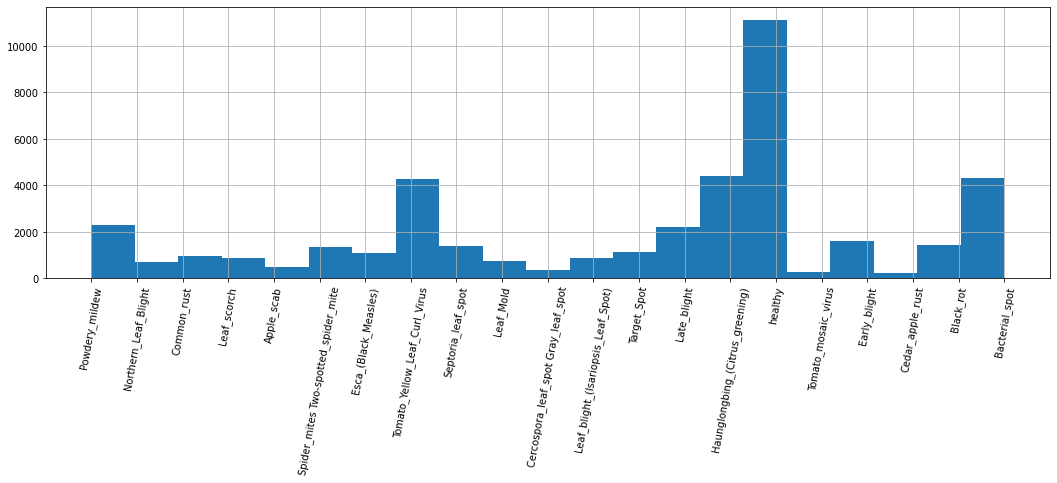

In [10]:
df_train.health.hist(figsize=(18,5), xrot=80, bins=df_train.health.value_counts().shape[0])

In [11]:
df_train.health.value_counts()

healthy                                 11137
Haunglongbing_(Citrus_greening)          4404
Bacterial_spot                           4332
Tomato_Yellow_Leaf_Curl_Virus            4284
Powdery_mildew                           2289
Late_blight                              2204
Early_blight                             1598
Black_rot                                1438
Septoria_leaf_spot                       1415
Spider_mites Two-spotted_spider_mite     1339
Target_Spot                              1122
Esca_(Black_Measles)                     1105
Common_rust                               952
Leaf_scorch                               886
Leaf_blight_(Isariopsis_Leaf_Spot)        859
Leaf_Mold                                 760
Northern_Leaf_Blight                      707
Apple_scab                                503
Cercospora_leaf_spot Gray_leaf_spot       358
Tomato_mosaic_virus                       297
Cedar_apple_rust                          219
Name: health, dtype: int64

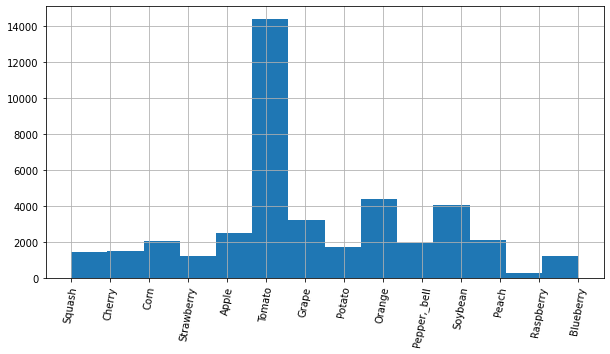

In [12]:
df_train.type.hist(figsize=(10,5), xrot=80, bins=df_train.type.value_counts().shape[0])

In [13]:
df_train.type.value_counts()

Tomato          14391
Orange           4404
Soybean          4071
Grape            3244
Apple            2532
Peach            2123
Corn             2034
Pepper,_bell     1976
Potato           1718
Cherry           1522
Squash           1449
Strawberry       1249
Blueberry        1200
Raspberry         295
Name: type, dtype: int64

./Plants/train/Tomato_Yellow_Leaf_Curl_Virus/Tomato/image (3120).JPG


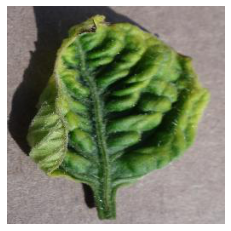

./Plants/train/healthy/Pepper,_bell/image (719).JPG


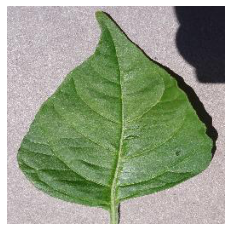

./Plants/train/Tomato_mosaic_virus/Tomato/image (16).JPG


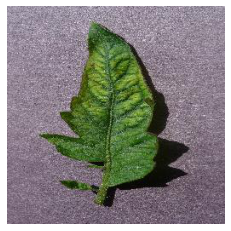

./Plants/train/Haunglongbing_(Citrus_greening)/Orange/image (921).JPG


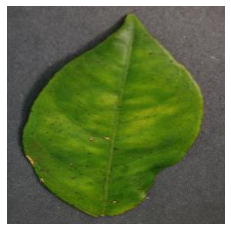

./Plants/train/Common_rust/Corn/image (181).JPG


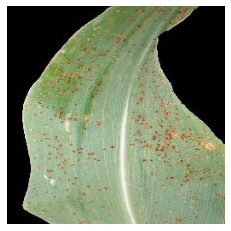

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

for index in np.random.choice(df_train.shape[0], 5):
  plant = df_train.iloc[index].file
  print(plant)
  plt.imshow(image.load_img(plant))
  plt.axis('off')
  plt.show()  

In [20]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=25,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

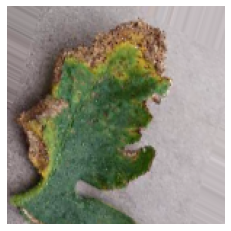

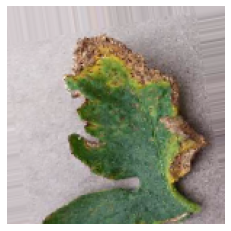

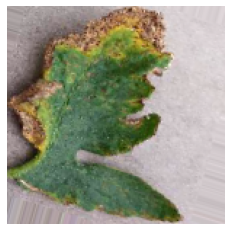

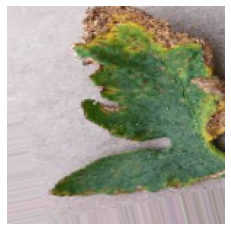

In [22]:
# Elegimos una imagen para "aumentar"
img_path = df_train.iloc[-2].file

# La leemos y la reescalamos
img = image.load_img(img_path, target_size=(150, 150))

# La convertimos a un Numpy de forma (150, 150, 3)
x = image.img_to_array(img)

# La reescalamos a (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# El comando .flow() genera batches de imágenes transformadas aleatoriamente
# Usamos un `break` para cortar el loop en algún momento
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.axis('off')
    i += 1
    if i % 4 == 0:
        break

In [23]:
from keras.preprocessing.image import ImageDataGenerator
data_dir = ""
# Reescalamos todas las imágenes en un factor de 1./255
train_datagen = ImageDataGenerator(
      rotation_range=25,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    df_train, # Referimos el df de train
    directory=data_dir, # El directorio donde se encuentran las imágenes
    x_col='file', # La columna con los path de los archivos
    y_col=['health', 'type'], # La variable con las labels
    target_size=(150, 150),
    classes=None, # Las clases se obtienen a partir de y_col
    class_mode='multi_output', # Se trata de un problema multi-output, multi-label
    batch_size=32
   )

val_generator = test_datagen.flow_from_dataframe(
    df_validation, # Referimos el df de validación
    directory=data_dir, # El directorio donde se encuentran las imágenes
    x_col='file', # La columna con los path de los archivos
    y_col=['health', 'type'], # La variable con las labels
    target_size=(150, 150),
    classes=None, # Las clases se obtienen a partir de y_col
    class_mode='multi_output', # Se trata de un problema multi-output, multi-label
    batch_size=32,
    shuffle=False
   )

Found 42208 validated image filenames.
Found 5272 validated image filenames.


In [98]:
df_train

,file,path,health,type
0,./Plants/train/Powdery_mildew/Squash/image (76...,./Plants/train/Powdery_mildew/Squash,Powdery_mildew,Squash
1,./Plants/train/Powdery_mildew/Squash/image (78...,./Plants/train/Powdery_mildew/Squash,Powdery_mildew,Squash
2,./Plants/train/Powdery_mildew/Squash/image (13...,./Plants/train/Powdery_mildew/Squash,Powdery_mildew,Squash
3,./Plants/train/Powdery_mildew/Squash/image (13...,./Plants/train/Powdery_mildew/Squash,Powdery_mildew,Squash
4,./Plants/train/Powdery_mildew/Squash/image (12...,./Plants/train/Powdery_mildew/Squash,Powdery_mildew,Squash
...,...,...,...,...
42203,./Plants/train/Bacterial_spot/Tomato/image (91...,./Plants/train/Bacterial_spot/Tomato,Bacterial_spot,Tomato
42204,./Plants/train/Bacterial_spot/Tomato/image (70...,./Plants/train/Bacterial_spot/Tomato,Bacterial_spot,Tomato
42205,./Plants/train/Bacterial_spot/Tomato/image (33...,./Plants/train/Bacterial_spot/Tomato,Bacterial_spot,Tomato
42206,./Plants/train/Bacterial_spot/Tomato/image (32...,./Plants/train/Bacterial_spot/Tomato,Bacterial_spot,Tomato


In [84]:
x, y = train_generator.next()
print('x shape: ',x.shape)
print('y1 shape: ',y[0].shape)
print('y2 shape: ',y[1].shape)
print('y1: ',y[0])
print('y2: ',y[1])

x shape:  [[[[0.52097297 0.5170514  0.63862   ]
   [0.5311479  0.5272263  0.64879495]
   [0.5410414  0.5371198  0.6586884 ]
   ...
   [0.5527897  0.541025   0.6625936 ]
   [0.5460734  0.5343087  0.6558773 ]
   [0.5358047  0.52404    0.6456086 ]]

  [[0.49177223 0.48785067 0.60941935]
   [0.49098954 0.48706797 0.6086366 ]
   [0.49020684 0.48628527 0.60785395]
   ...
   [0.55153596 0.53977126 0.6613399 ]
   [0.5439986  0.5322339  0.6538025 ]
   [0.53354603 0.5217813  0.64334995]]

  [[0.50530463 0.50138307 0.6229517 ]
   [0.4998258  0.49590424 0.6174728 ]
   [0.49434698 0.4904254  0.611994  ]
   ...
   [0.5498277  0.538063   0.6596316 ]
   [0.54143614 0.52967143 0.65124005]
   [0.53952503 0.5277603  0.64932895]]

  ...

  [[0.4210328  0.4053465  0.49554262]
   [0.4295534  0.41386712 0.50406325]
   [0.41960788 0.40232524 0.49252135]
   ...
   [0.4581371  0.44245082 0.54049003]
   [0.46361592 0.44792965 0.54596883]
   [0.46909475 0.45340848 0.5514477 ]]

  [[0.43042845 0.41474217 0.5049382

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
heal_encoder = OneHotEncoder()
heal_encoder.fit(df_train['health'].to_numpy().reshape(-1, 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [70]:
type_encoder = OneHotEncoder()
type_encoder.fit(df_train['type'].to_numpy().reshape(-1, 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [71]:
type_encoder.transform(y[1].reshape(-1, 1)).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0

In [103]:
def custom_generator(generator):
  while True:
    x, y = generator.next()
    y1_encoded = heal_encoder.transform(y[0].reshape(-1, 1)).toarray()
    y2_encoded = type_encoder.transform(y[1].reshape(-1, 1)).toarray()

    yield (x, [y1_encoded, y2_encoded])

In [109]:
for item in custom_generator(train_generator):
  print(item)
  break

(array([[[[0.8125501 , 0.7654913 , 0.7811776 ],
         [0.83379227, 0.78673345, 0.8024197 ],
         [0.8415898 , 0.794531  , 0.8078432 ],
         ...,
         [0.8117883 , 0.7627805 , 0.7568943 ],
         [0.8035832 , 0.75047284, 0.7459541 ],
         [0.811555  , 0.7566531 , 0.7527315 ]],

        [[0.80420005, 0.75714123, 0.7728275 ],
         [0.83140653, 0.7843477 , 0.800034  ],
         [0.8392041 , 0.79214525, 0.8078315 ],
         ...,
         [0.82110775, 0.7662058 , 0.7622842 ],
         [0.84162056, 0.7867186 , 0.78279704],
         [0.85727894, 0.802377  , 0.7984554 ]],

        [[0.7946968 , 0.7487911 , 0.7644774 ],
         [0.8231413 , 0.77608246, 0.7917687 ],
         [0.83681834, 0.78975946, 0.80544573],
         ...,
         [0.852821  , 0.79791903, 0.79399747],
         [0.84324837, 0.7883464 , 0.78442484],
         [0.83367574, 0.7787737 , 0.77485216]],

        ...,

        [[0.8109708 , 0.7521472 , 0.7403825 ],
         [0.8191759 , 0.7603524 , 0.74858767

Ahora, veamos cómo definir la misma red con la clase `Model` y la sintaxis de la API funcional:

In [91]:
# Importamos las clases Model e Input del módulo de modelos y capas, respectivamente
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D


health_utput_units =  df_train.health.value_counts().shape[0]
type_utput_units =  df_train.type.value_counts().shape[0]

# Definimos una variable que será una instancia de la clase Input
# donde especificamos las dimensiones de los datos de entrada
input_layer = Input(shape=(150, 150, 3))
# Definimos una variable distinta para cada capa del modelo
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)

########## HEALTH LAYERS
x_health = Conv2D(64, (3, 3), activation='relu')(x)
x_health = MaxPooling2D((2, 2))(x_health)

x_health = Conv2D(128, (3, 3), activation='relu')(x_health)
x_health = MaxPooling2D((2, 2))(x_health)

x_health = Conv2D(128, (3, 3), activation='relu')(x_health)
x_health = MaxPooling2D((2, 2))(x_health)

x_health = GlobalAveragePooling2D(name='avg_pool_health')(x_health)
x_health = Dense(512, activation='relu')(x_health)
health_output_layer = Dense(health_utput_units, activation='softmax', name='health_output')(x_health)
##########
########## TYPE LAYERS
x_type = Conv2D(64, (3, 3), activation='relu')(x)
x_type = MaxPooling2D((2, 2))(x_type)

x_type = Conv2D(128, (3, 3), activation='relu')(x_type)
x_type = MaxPooling2D((2, 2))(x_type)

x_type = Conv2D(128, (3, 3), activation='relu')(x_type)
x_type = MaxPooling2D((2, 2))(x_type)

x_type = GlobalAveragePooling2D(name='avg_pool_type')(x_type)
x_type = Dense(512, activation='relu')(x_type)
x_type_output_layer = Dense(type_utput_units, activation='softmax', name='type_output')(x_type)
##########

# Creamos la instancia del modelo multi-input
# Al haber múltiples entradas, definimos una lista de inputs
model = Model(input_layer, [health_output_layer,x_type_output_layer])

In [92]:
# Vemos que el summary del modelo es exactamente el mismo
# salvo que ahora se especifica la InputLayer, antes omitida
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 148, 148, 32) 896         input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_14 (MaxPooling2D) (None, 74, 74, 32)   0           conv2d_14[0][0]                  
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 72, 72, 64)   18496       max_pooling2d_14[0][0]           
_______________________________________________________________________________________

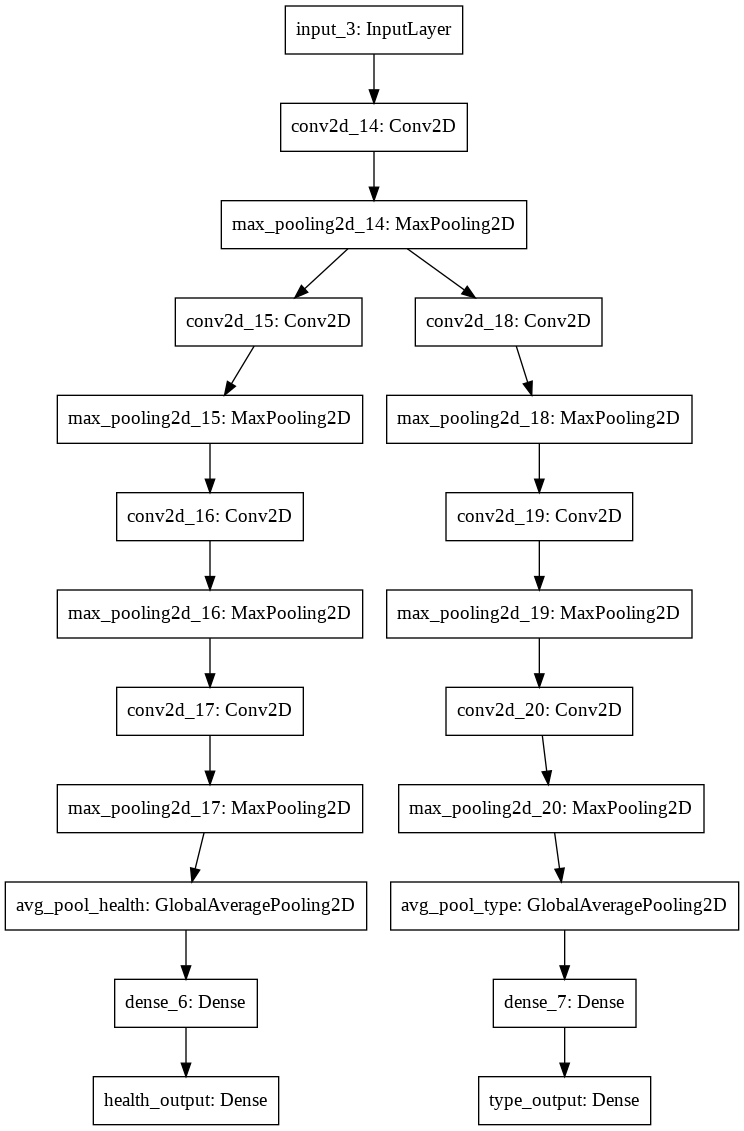

In [93]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [100]:
from keras import optimizers

model.compile(loss={'health_output' : 'categorical_crossentropy', 'type_output': 'categorical_crossentropy'}, 
              # loss_weights={'health_output' : 1, 'type_output': 1},
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics={'health_output' : 'accuracy', 'type_output': 'accuracy'})

In [101]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Instanciamos nuestro objeto early_stopping
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, restore_best_weights=True, verbose=1)

checkpoint = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/Desafio II/labels_w/weights.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', verbose=0,
                             save_best_only=True, save_weights_only=False, mode='auto')

# Definimos una lista de callbacks
callbacks_list = [checkpoint]

In [107]:
spe = 42000 / 20
history = model.fit_generator(custom_generator(train_generator),
                              steps_per_epoch=spe,
                              epochs=10,
                              validation_data=custom_generator(val_generator),
                              validation_steps=100,
                              callbacks=callbacks_list)

Epoch 1/10


TypeError: ignored

In [ ]:
model.save('drive/My Drive/plans_disease_1.h5')

Found 5288 images belonging to 39 classes.
39
Instructions for updating:
Please use Model.evaluate, which supports generators.
Accuracy en test: 0.79
Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry_

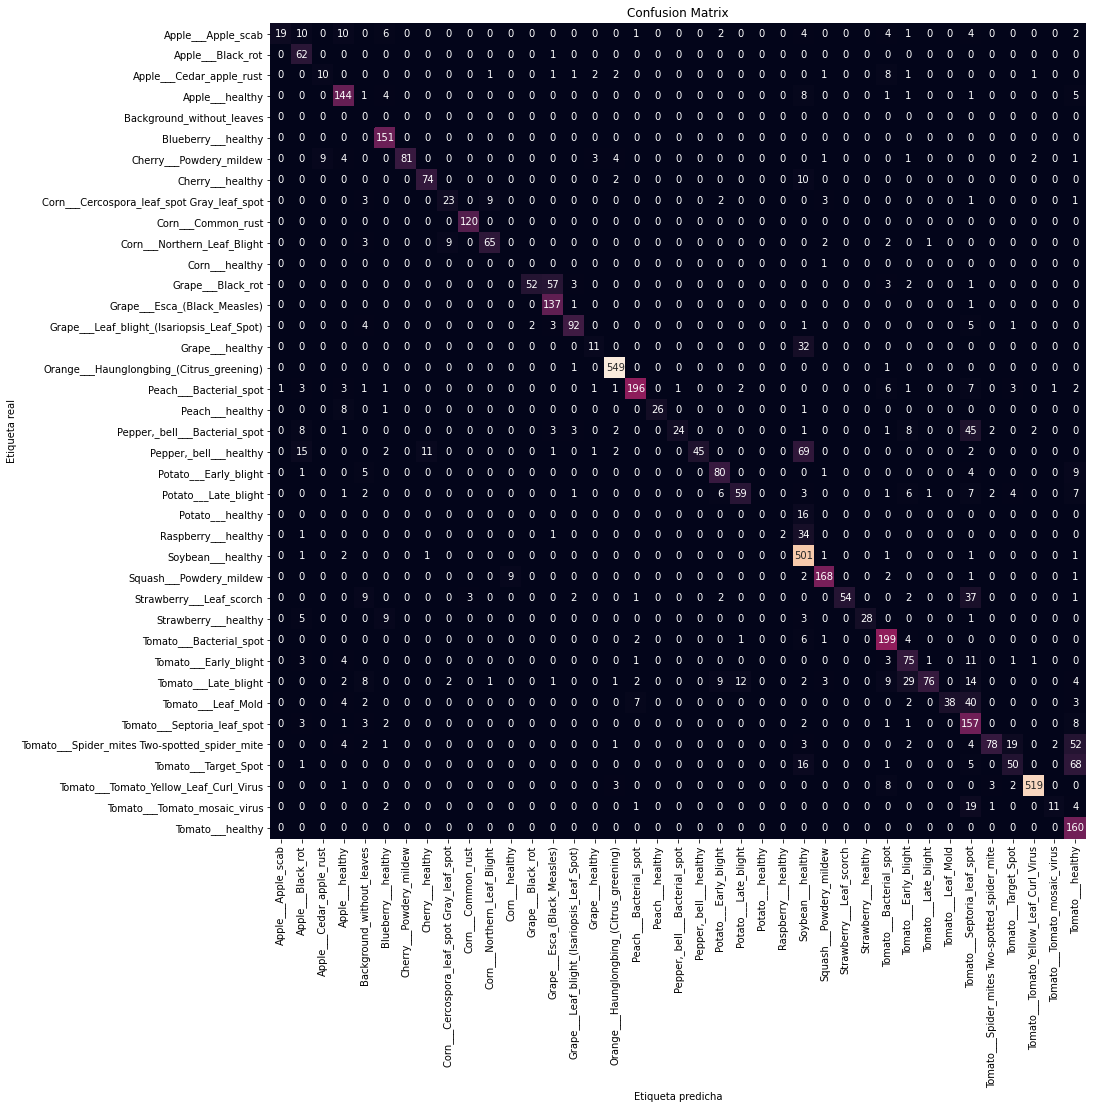

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

test_datagen = ImageDataGenerator(rescale=1./255)

# Creamos la instancias de flow_from_dataframe()
test_generator = test_datagen.flow_from_dataframe(
    df_test,
    directory=data_dir,
    x_col='file',
    y_col=['health', 'type'],
    target_size=(150, 150),
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=False
   )

labels = validation_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
tick_labels = list(labels.values())
print(len(tick_labels))
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('Accuracy en test:', np.round(test_acc, 2))

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)

print(tick_labels)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='.0f', square=True,
             xticklabels=tick_labels, yticklabels=tick_labels,
             cbar=False)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predicha')
plt.title('Confusion Matrix')
plt.show()




In [ ]:
# # Classification report
len(tick_labels)
print('\nClassification Report:\n')
print(classification_report(test_generator.classes, y_pred, target_names=tick_labels, digits = 6, labels=range(len(tick_labels))))


Classification Report:

                                               precision    recall  f1-score   support

                           Apple___Apple_scab   0.950000  0.301587  0.457831        63
                            Apple___Black_rot   0.548673  0.984127  0.704545        63
                     Apple___Cedar_apple_rust   0.526316  0.357143  0.425532        28
                              Apple___healthy   0.761905  0.872727  0.813559       165
                    Background_without_leaves   0.000000  0.000000  0.000000         0
                          Blueberry___healthy   0.843575  1.000000  0.915152       151
                      Cherry___Powdery_mildew   1.000000  0.764151  0.866310       106
                             Cherry___healthy   0.860465  0.860465  0.860465        86
   Corn___Cercospora_leaf_spot Gray_leaf_spot   0.676471  0.547619  0.605263        42
                           Corn___Common_rust   0.975610  1.000000  0.987654       120
                 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


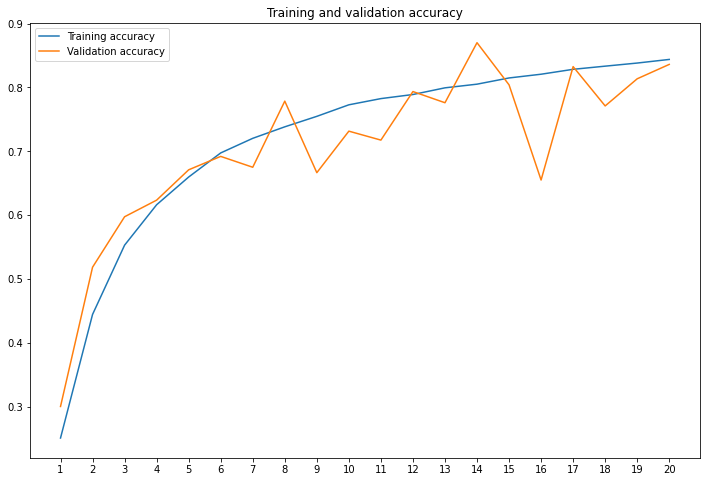

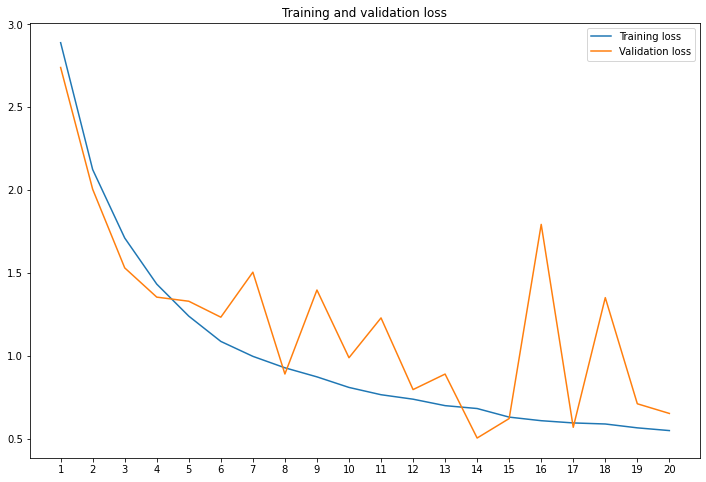

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.xticks(ticks=epochs)
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12,8))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xticks(ticks=epochs)
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt